# Dark matter substructure model:

In [1]:
from subhalos_latest2 import *

plt.rc('font', **{'family':'sans-serif','size':15})
plt.rc('text', usetex=False)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.minor.size'] = 2
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['ytick.minor.size'] = 2
plt.rcParams['ytick.minor.width'] = 1
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.pad'] = 8
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True

Define the main variables of the new model (The subhalos spatial distribution is defines as the one of a host halo of mass M0 at redshift 0): 

In [2]:
M0=1e12                         #Mass of the host halo.
N_ma=300                        #number of subhalo mass values in a given range.
zmax=7                          #highest redshift value for mass accretion.
N_r=100                         #The number of distance/Rvir values in the given range [0.01,1]

logmamin=-6                      #The minimum subhalos' masss in units of ln(mass).
mmodel_1=5                      #This variable defines the dm/dt model for the calculation,see subhalos_latest2.py
                                #at function msolve for more details. 
    
mmodel_2=4                      #This dm/dt model correspond to the model with no spatial information.
mmodel_3=1
rmin=0.0001                   #Minimum distance/Rvir of subhalos' positions from host's center.
logr=True                       #Argument for logspace values of distance/Rvir.
redshift=0
dz=0.3

The new model for the above parameters can be calculated:

In [3]:
path = "data/01/"
data_cat = ["m0","ct0","rs0","rhos0","r","weight","survive","rs_a","rhos_a"]

In [4]:
def haloloader(index,data_cat,path=path):
    halo = {" " : " "}
    for i in data_cat:
        halo[i] = np.loadtxt(path+i+"_"+str(index)+".txt")
    return halo

halos_av = haloloader(1,data_cat)
halos_4 = haloloader(4,data_cat)
halos_toy = haloloader(5,data_cat)

In [5]:
#Calculating the substructure with the new model with use of spatial information for dm/dt of toy model:

ma200_new, rs_a_new, rhos_a_new, m0_new, rs0_new, rhos0_new, ct0_new, weight_new, survive_new,r_new,zacc_new  \
    = rs_rhos_calc_new(M0=M0,logmamin=logmamin,N_ma=N_ma, zmax=zmax,N_r=N_r,mmodel=mmodel_1,
                       rmin=rmin,logr=logr,dz=dz)

ma200_new  *= Msolar
m0_new     *= Msolar
rs_a_new   *= kpc
rs0_new    *= kpc
rhos_a_new *= Msolar/pc**3
rhos0_new  *= Msolar/pc**3

rpeak_new = 2.163*rs_a_new
rmax_new  = 2.163*rs0_new
Vpeak_new = np.sqrt(4.*np.pi*G*rhos_a_new/4.625)*rs_a_new
Vmax_new  = np.sqrt(4.*np.pi*G*rhos0_new/4.625)*rs0_new

/home/tsexos/jupyter/environment/Lefteris_subhalos/CDM_substructure_models_final/data_way/subhalos_latest2.py:179: RuntimeWarning: invalid value encountered in power
  return pow(2*np.pi,-0.5)*(delc2-delc1)*pow(sig2-sig1,-1.5)*np.exp(-pow(delc2-delc1,2)*pow(2*(sig2-sig1),-1))
/home/tsexos/jupyter/environment/Lefteris_subhalos/CDM_substructure_models_final/data_way/subhalos_latest2.py:179: RuntimeWarning: overflow encountered in exp
  return pow(2*np.pi,-0.5)*(delc2-delc1)*pow(sig2-sig1,-1.5)*np.exp(-pow(delc2-delc1,2)*pow(2*(sig2-sig1),-1))
/home/tsexos/jupyter/environment/Lefteris_subhalos/CDM_substructure_models_final/data_way/subhalos_latest2.py:215: RuntimeWarning: invalid value encountered in true_divide
  Phi = Ffunc_Yang(delcM,delca,sM,sa)/normB*np.heaviside(mmax-ma,0)


In [6]:
#Calculating the substructure with the new model with use of spatial information for dm/dt of model 4:

ma200_new2,rs_a_new2,rhos_a_new2,m0_new2,rs0_new2,rhos0_new2,ct0_new2,weight_new2,survive_new2,r_new2,zacc_new2  \
    = rs_rhos_calc_new(M0=M0,logmamin=logmamin,N_ma=N_ma, zmax=zmax,N_r=N_r,mmodel=mmodel_2,
                       rmin=rmin,logr=logr,dz=dz)

ma200_new2  *= Msolar
m0_new2     *= Msolar
rs_a_new2   *= kpc
rs0_new2    *= kpc
rhos_a_new2 *= Msolar/pc**3
rhos0_new2  *= Msolar/pc**3

rpeak_new2 = 2.163*rs_a_new2
rmax_new2  = 2.163*rs0_new2
Vpeak_new2 = np.sqrt(4.*np.pi*G*rhos_a_new2/4.625)*rs_a_new2
Vmax_new2  = np.sqrt(4.*np.pi*G*rhos0_new2/4.625)*rs0_new2

In [7]:
#Calculating the substructure with the initial model with no use of spatial information:

ma200_av, rs_a_av, rhos_a_av, m0_av, rs0_av, rhos0_av, ct0_av, weight_av, survive_av,r_av,zacc_av  \
    = rs_rhos_calc_new(M0=M0,logmamin=logmamin,N_ma=N_ma, zmax=zmax,N_r=1,mmodel=mmodel_3,dz=dz)

ma200_av  *= Msolar
m0_av     *= Msolar
rs_a_av   *= kpc
rs0_av    *= kpc
rhos_a_av *= Msolar/pc**3
rhos0_av  *= Msolar/pc**3

rpeak_av = 2.163*rs_a_av
rmax_av  = 2.163*rs0_av
Vpeak_av = np.sqrt(4.*np.pi*G*rhos_a_av/4.625)*rs_a_av
Vmax_av  = np.sqrt(4.*np.pi*G*rhos0_av/4.625)*rs0_av

##  Characteristics of Subhalos:

In [8]:
m_min2 = 1
def c_stat(ct0,m0,weight,survive,m_min=m_min2):
    w = (m0>10**m_min*Msolar)*(survive==1)
    N_c,c_edges = np.histogram(ct0[w],weights=weight[w],bins=40)
    c = (c_edges[1:]+c_edges[:-1])/2.
    return c,N_c

c_toy,N_c_toy = c_stat(ct0_new,m0_new,weight_new,survive_new)
c_4,N_c_4 = c_stat(ct0_new2,m0_new2,weight_new2,survive_new2)
c_av,N_c_av = c_stat(ct0_av,m0_av,weight_av,survive_av)

def rs_stat(rs0,m0,weight,survive,m_min=m_min2):
    w = (m0>10**m_min*Msolar)*(survive==1)
    N_rs,lnrs_edges = np.histogram(np.log(rs0[w]/kpc),weights=weight[w],bins=40)
    lnrs = (lnrs_edges[1:]+lnrs_edges[:-1])/2.
    rs = np.exp(lnrs)
    return rs,N_rs
    plt.step(rs,N_rs)


rs_toy,N_rs_toy = rs_stat(rs0_new,m0_new,weight_new,survive_new)
rs_4,N_rs_4 = rs_stat(rs0_new2,m0_new2,weight_new2,survive_new2)
rs_av,N_rs_av = rs_stat(rs0_av,m0_av,weight_av,survive_av)

def rhos_stat(rhos0,m0,weight,survive,m_min=m_min2):
    w = (m0>10**m_min*Msolar)*(survive==1)
    N_rhos,lnrhos_edges = np.histogram(np.log(rhos0[w]/(Msolar/pc**3)),weights=weight[w],bins=40)
    lnrhos = (lnrhos_edges[1:]+lnrhos_edges[:-1])/2.
    rhos = np.exp(lnrhos)
    return rhos,N_rhos

rhos_toy,N_rhos_toy = rhos_stat(rhos0_new,m0_new,weight_new,survive_new)
rhos_4,N_rhos_4 = rhos_stat(rhos0_new2,m0_new2,weight_new2,survive_new2)
rhos_av,N_rhos_av = rhos_stat(rhos0_av,m0_av,weight_av,survive_av)

def m_stat(m0,weight,survive,m_min=m_min2):
    w = (m0>10**m_min*Msolar)*(survive==1)
    N_m,lnm_edges = np.histogram(np.log(m0[w]/(Msolar)),weights=weight[w],bins=40)
    lnm = (lnm_edges[1:]+lnm_edges[:-1])/2.
    m = np.exp(lnm)
    return m,N_m

m_toy,N_m_toy = m_stat(m0_new,weight_new,survive_new)
m_4,N_m_4 = m_stat(m0_new2,weight_new2,survive_new2)
m_av,N_m_av = m_stat(m0_av,weight_av,survive_av)

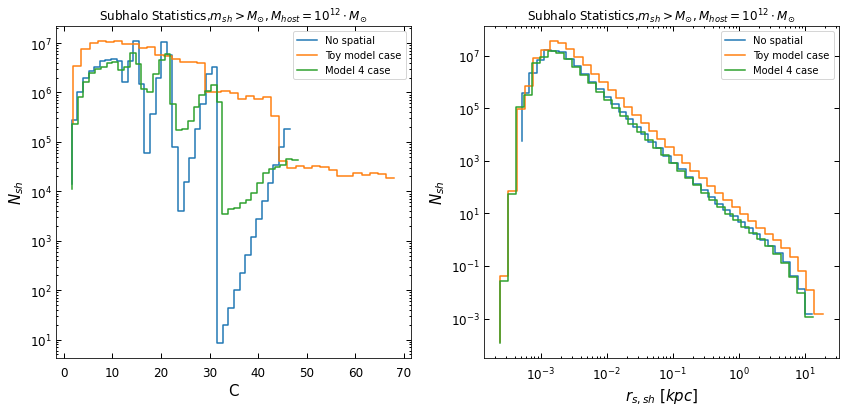

In [49]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))

ax1.step(c_av,N_c_av)
ax1.step(c_toy,N_c_toy)
ax1.step(c_4,N_c_4)
ax1.set_xlabel(r'C')

ax2.step(rs_av,N_rs_av)
ax2.step(rs_toy,N_rs_toy)
ax2.step(rs_4,N_rs_4)
ax2.set_xlabel(r'$r_{s,sh}$ $[kpc]$')

for ax in (ax1,ax2):
    ax.tick_params(labelsize=12)
    ax.set_title(r'Subhalo Statistics,$m_{sh}>M_{\odot},M_{host}=10^{12} \cdot M_{\odot}$',fontsize=12)
    ax.legend(['No spatial','Toy model case','Model 4 case '],fontsize=10)
    ax.set_ylabel(r'$N_{sh}$')
    ax.set_yscale('log')

ax2.set_xscale('log')
plt.tight_layout()
#plt.savefig('subh_comp_c_rs_toy_4.png')
plt.show()

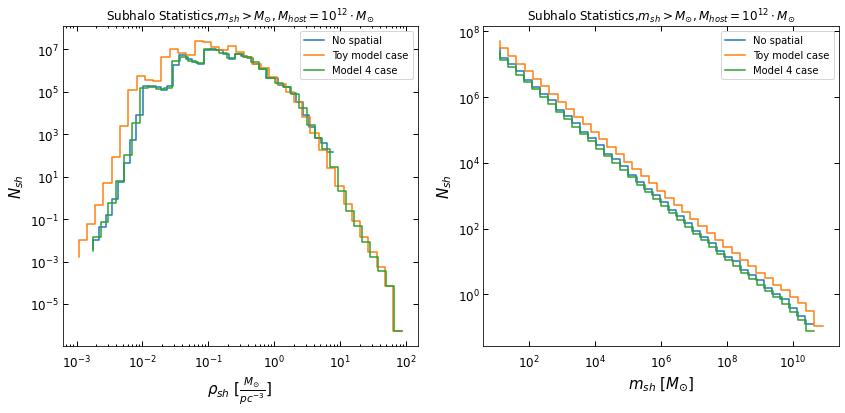

In [48]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))

ax1.step(rhos_av,N_rhos_av)
ax1.step(rhos_toy,N_rhos_toy)
ax1.step(rhos_4,N_rhos_4)
ax1.set_xlabel(r'$\rho_{sh}$ $[\frac{M_{\odot}}{pc^{-3}}]$')

ax2.step(m_av,N_m_av)
ax2.step(m_toy,N_m_toy)
ax2.step(m_4,N_m_4)
ax2.set_xlabel(r'$m_{sh}$ $[M_{\odot}]$')

for ax in (ax1,ax2):
    ax.tick_params(labelsize=12)
    ax.set_title(r'Subhalo Statistics,$m_{sh}>M_{\odot},M_{host}=10^{12} \cdot M_{\odot}$',fontsize=12)
    ax.legend(['No spatial','Toy model case','Model 4 case '],fontsize=10)
    ax.set_ylabel(r'$N_{sh}$')
    ax.set_yscale('log')
    ax.set_xscale('log')
    
plt.tight_layout()
#plt.savefig('subh_comp_mass_rho_toy_4.png')
plt.show()

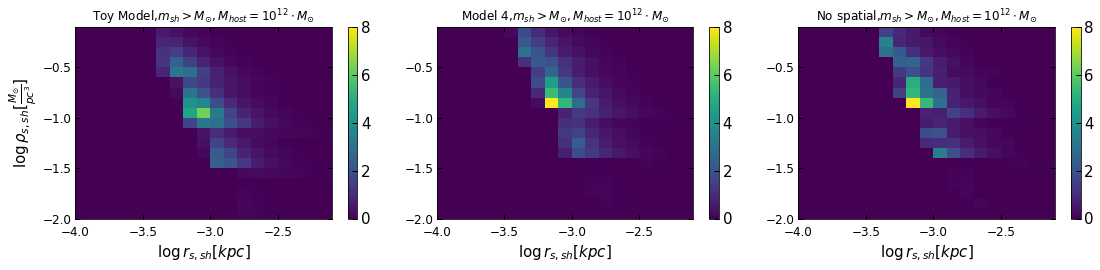

In [23]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(16,4))
bin_x = np.arange(-4,-2,0.1)
bin_y = np.arange(-2,0,0.1)
m_min = 0
w = (m0_new>10**m_min*Msolar)*(survive_new==1)
cb1=ax1.hist2d(np.log10(rs0_new[w]/kpc),np.log10(rhos0_new[w]/(Msolar/pc**3)),
              weights=weight_new[w], density=True,bins=[bin_x, bin_y],vmin=0, vmax=8)

w = (m0_new2>10**m_min*Msolar)*(survive_new2==1)
cb2=ax2.hist2d(np.log10(rs0_new2[w]/kpc),np.log10(rhos0_new2[w]/(Msolar/pc**3)),
              weights=weight_new2[w], density=True,bins=[bin_x, bin_y],vmin=0, vmax=8)

w = (m0_av>10**m_min*Msolar)*(survive_av==1)
cb3=ax3.hist2d(np.log10(rs0_av[w]/kpc),np.log10(rhos0_av[w]/(Msolar/pc**3)),
              weights=weight_av[w], density=True,bins=[bin_x, bin_y],vmin=0, vmax=8)

for ax in (ax1,ax2,ax3):
    ax.tick_params(labelsize=12)
    ax.set_xlabel(r'$\logr_{s,sh} [kpc]$')
    
fig.colorbar(cb1[3], ax=ax1, orientation='vertical')
fig.colorbar(cb2[3], ax=ax2, orientation='vertical')
fig.colorbar(cb3[3], ax=ax3, orientation='vertical')
#plt.colorbar(img, ax=ax)
ax1.set_ylabel(r'$\log\rho_{s,sh} [\frac{M_{\odot}}{pc^{3}}]$')
ax1.set_title('Toy Model,$m_{sh}>M_{\odot},M_{host}=10^{12} \cdot M_{\odot}$',fontsize=12)
ax2.set_title('Model 4,$m_{sh}>M_{\odot},M_{host}=10^{12} \cdot M_{\odot}$',fontsize=12)
ax3.set_title('No spatial,$m_{sh}>M_{\odot},M_{host}=10^{12} \cdot M_{\odot}$',fontsize=12)

plt.tight_layout()
#plt.savefig('subh_comp_2d_rs_rho_4.png')
plt.show()

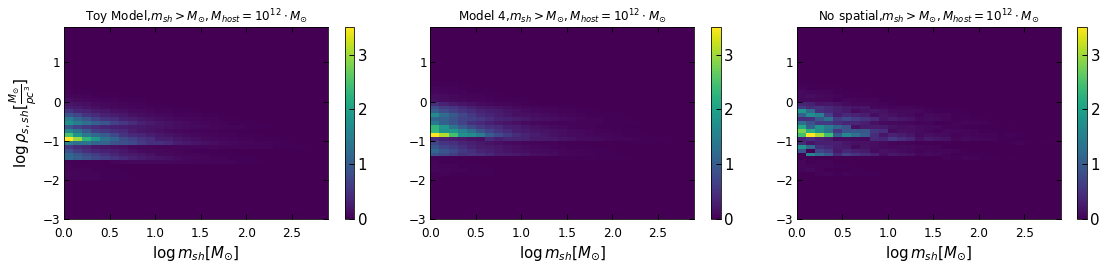

In [26]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(16,4))
bin_x = np.arange(0,3,0.1)
bin_y = np.arange(-3,2,0.1)
m_min = 0
w = (m0_new>10**m_min*Msolar)*(survive_new==1)
cb1=ax1.hist2d(np.log10(m0_new[w]/Msolar),np.log10(rhos0_new[w]/(Msolar/pc**3)),
              weights=weight_new[w], density=True,bins=[bin_x, bin_y],vmin=0, vmax=3.5)

w = (m0_new2>10**m_min*Msolar)*(survive_new2==1)
cb2=ax2.hist2d(np.log10(m0_new2[w]/Msolar),np.log10(rhos0_new2[w]/(Msolar/pc**3)),
              weights=weight_new2[w], density=True,bins=[bin_x, bin_y],vmin=0, vmax=3.5)

w = (m0_av>10**m_min*Msolar)*(survive_av==1)
cb3=ax3.hist2d(np.log10(m0_av[w]/Msolar),np.log10(rhos0_av[w]/(Msolar/pc**3)),
              weights=weight_av[w], density=True,bins=[bin_x, bin_y],vmin=0, vmax=3.5)

for ax in (ax1,ax2,ax3):
    ax.tick_params(labelsize=12)
    ax.set_xlabel(r'$\logm_{sh}[M_{\odot}]$')

ax1.set_ylabel(r'$\log\rho_{s,sh}[\frac{M_{\odot}}{pc^{3}}]$')
fig.colorbar(cb1[3],ax=ax1, orientation='vertical')
fig.colorbar(cb2[3],ax=ax2, orientation='vertical')
fig.colorbar(cb3[3],ax=ax3, orientation='vertical')
ax1.set_title('Toy Model,$m_{sh}>M_{\odot},M_{host}=10^{12} \cdot M_{\odot}$',fontsize=12)
ax2.set_title('Model 4,$m_{sh}>M_{\odot},M_{host}=10^{12} \cdot M_{\odot}$',fontsize=12)
ax3.set_title('No spatial,$m_{sh}>M_{\odot},M_{host}=10^{12} \cdot M_{\odot}$',fontsize=12)

plt.tight_layout()
#plt.savefig('subh_comp_2d_mass_rho_toy_4.png')
plt.show()

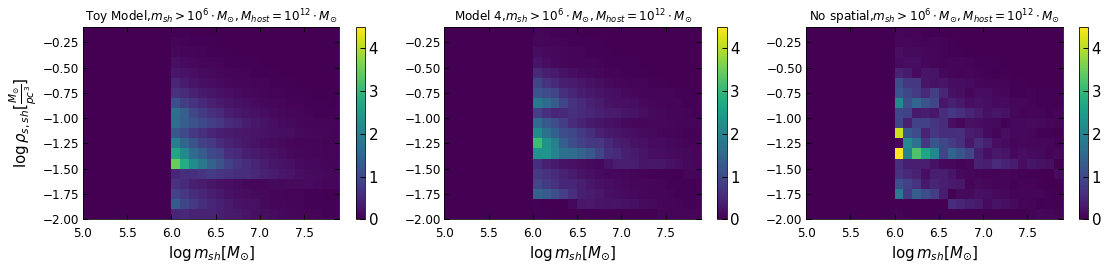

In [28]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(16,4))
bin_x = np.arange(5,8,0.1)
bin_y = np.arange(-2,0,0.1)
m_min=6

w = (m0_new>10**m_min*Msolar)*(survive_new==1)
cb1=ax1.hist2d(np.log10(m0_new[w]/Msolar),np.log10(rhos0_new[w]/(Msolar/pc**3)),
              weights=weight_new[w], density=True,bins=[bin_x, bin_y],vmin=0, vmax=4.5)

w = (m0_new2>10**m_min*Msolar)*(survive_new2==1)
cb2=ax2.hist2d(np.log10(m0_new2[w]/Msolar),np.log10(rhos0_new2[w]/(Msolar/pc**3)),
              weights=weight_new2[w], density=True,bins=[bin_x, bin_y],vmin=0, vmax=4.5)

w = (m0_av>10**m_min*Msolar)*(survive_av==1)
cb3=ax3.hist2d(np.log10(m0_av[w]/Msolar),np.log10(rhos0_av[w]/(Msolar/pc**3)),
              weights=weight_av[w], density=True,bins=[bin_x, bin_y],vmin=0, vmax=4.5)

for ax in (ax1,ax2,ax3):
    ax.tick_params(labelsize=12)
    ax.set_xlabel(r'$\logm_{sh}[M_{\odot}]$')

ax1.set_ylabel(r'$\log\rho_{s,sh}[\frac{M_{\odot}}{pc^{3}}]$')
fig.colorbar(cb1[3],ax=ax1, orientation='vertical')
fig.colorbar(cb2[3],ax=ax2, orientation='vertical')
fig.colorbar(cb3[3],ax=ax3, orientation='vertical')
ax1.set_title('Toy Model,$m_{sh}>10^{6} \cdot M_{\odot},M_{host}=10^{12} \cdot M_{\odot}$',fontsize=12)
ax2.set_title('Model 4,$m_{sh}>10^{6} \cdot M_{\odot},M_{host}=10^{12} \cdot M_{\odot}$',fontsize=12)
ax3.set_title('No spatial,$m_{sh}>10^{6} \cdot M_{\odot},M_{host}=10^{12} \cdot M_{\odot}$',fontsize=12)

plt.tight_layout()
#plt.savefig('subh_comp_2d_mass_6_rho_toy_4.png')
plt.show()

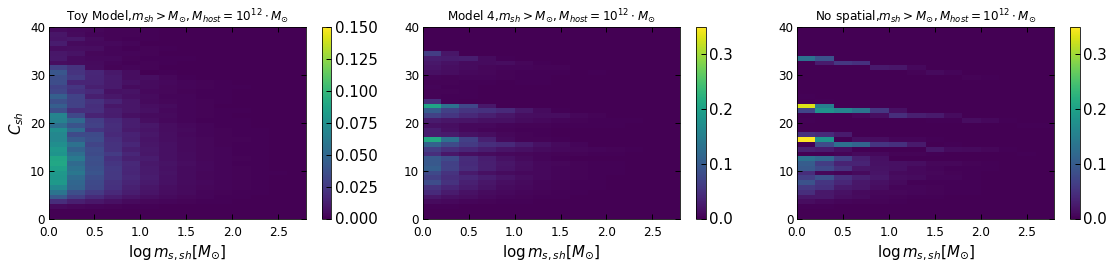

In [47]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,  figsize=(16,4))
bin_x = np.arange(0,3,0.2)
bin_y = np.arange(0,41,1)
m_min=0

w = (m0_new>10**m_min*Msolar)*(survive_new==1)
cb1=ax1.hist2d(np.log10(m0_new[w]/Msolar),ct0_new[w],
              weights=weight_new[w], density=True,bins=[bin_x, bin_y],vmin=0, vmax=0.15)

w = (m0_new2>10**m_min*Msolar)*(survive_new2==1)
cb2=ax2.hist2d(np.log10(m0_new2[w]/Msolar),ct0_new2[w],
              weights=weight_new2[w], density=True,bins=[bin_x, bin_y],vmin=0, vmax=0.35)

w = (m0_av>10**m_min*Msolar)*(survive_av==1)
cb3=ax3.hist2d(np.log10(m0_av[w]/Msolar),ct0_av[w],
              weights=weight_av[w], density=True,bins=[bin_x, bin_y],vmin=0, vmax=0.35)

for ax in (ax1,ax2,ax3):
    ax.tick_params(labelsize=12)
    ax.set_xlabel(r'$\logm_{s,sh}[M_{\odot}]$')
ax1.set_ylabel(r'$C_{sh}$')
fig.colorbar(cb1[3],ax=ax1, orientation='vertical')
fig.colorbar(cb2[3],ax=ax2, orientation='vertical')
fig.colorbar(cb3[3],ax=ax3, orientation='vertical')
ax1.set_title('Toy Model,$m_{sh}> M_{\odot},M_{host}=10^{12} \cdot M_{\odot}$',fontsize=12)
ax2.set_title('Model 4,$m_{sh}> M_{\odot},M_{host}=10^{12} \cdot M_{\odot}$',fontsize=12)
ax3.set_title('No spatial,$m_{sh}> M_{\odot},M_{host}=10^{12} \cdot M_{\odot}$',fontsize=12)

plt.tight_layout()
#plt.savefig('subh12_comp_2d_mass_c_toy_4.png')
plt.show()

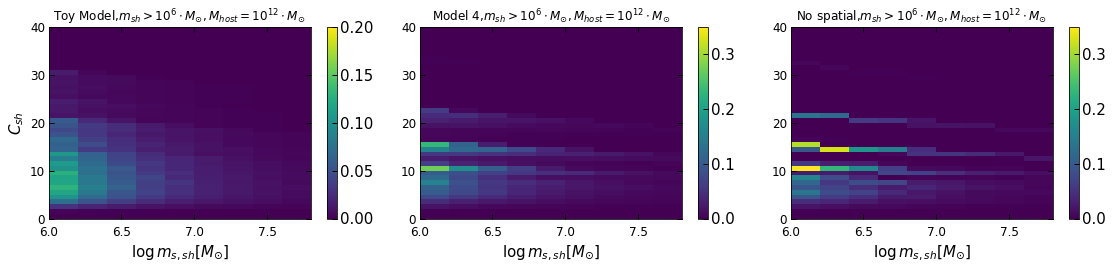

In [46]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,  figsize=(16,4))
bin_x = np.arange(6,8,0.2)
bin_y = np.arange(0,41,1)
m_min=6

w = (m0_new>10**m_min*Msolar)*(survive_new==1)
cb1=ax1.hist2d(np.log10(m0_new[w]/Msolar),ct0_new[w],
              weights=weight_new[w], density=True,bins=[bin_x, bin_y],vmin=0, vmax=0.2)

w = (m0_new2>10**m_min*Msolar)*(survive_new2==1)
cb2=ax2.hist2d(np.log10(m0_new2[w]/Msolar),ct0_new2[w],
              weights=weight_new2[w], density=True,bins=[bin_x, bin_y],vmin=0, vmax=0.35)

w = (m0_av>10**m_min*Msolar)*(survive_av==1)
cb3=ax3.hist2d(np.log10(m0_av[w]/Msolar),ct0_av[w],
              weights=weight_av[w], density=True,bins=[bin_x, bin_y],vmin=0, vmax=0.35)

for ax in (ax1,ax2,ax3):
    ax.tick_params(labelsize=12)
    ax.set_xlabel(r'$\logm_{s,sh}[M_{\odot}]$')
ax1.set_ylabel(r'$C_{sh}$')
fig.colorbar(cb1[3],ax=ax1, orientation='vertical')
fig.colorbar(cb2[3],ax=ax2, orientation='vertical')
fig.colorbar(cb3[3],ax=ax3, orientation='vertical')
ax1.set_title('Toy Model,$m_{sh}>10^{6} \cdot M_{\odot},M_{host}=10^{12} \cdot M_{\odot}$',fontsize=12)
ax2.set_title('Model 4,$m_{sh}>10^{6} \cdot M_{\odot},M_{host}=10^{12} \cdot M_{\odot}$',fontsize=12)
ax3.set_title('No spatial,$m_{sh}>10^{6} \cdot M_{\odot},M_{host}=10^{12} \cdot M_{\odot}$',fontsize=12)

plt.tight_layout()
#plt.savefig('subh_comp_2d_mass_6_c_toy_4.png')
plt.show()

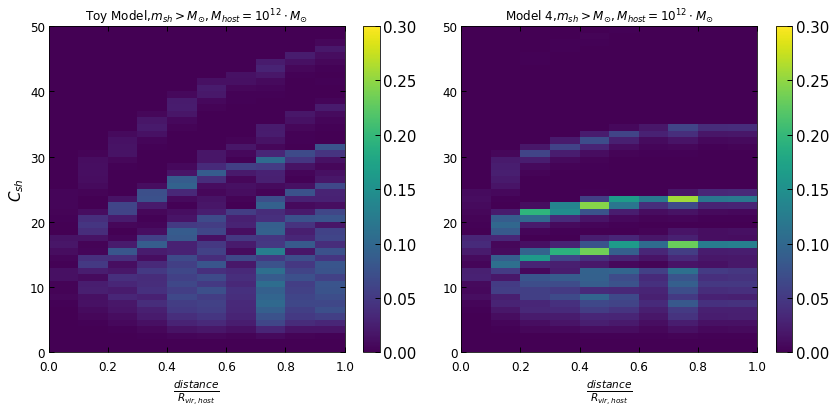

In [45]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))
bin_x = np.arange(0,1.1,0.1)
bin_y = np.arange(0,51,1)
m_min=0

w = (m0_new>10**m_min*Msolar)*(survive_new==1)
cb1=ax1.hist2d(r_new[w],ct0_new[w],
              weights=weight_new[w], density=True,bins=[bin_x, bin_y],vmin=0, vmax=0.3)

w = (m0_new2>10**m_min*Msolar)*(survive_new2==1)
cb2=ax2.hist2d(r_new2[w],ct0_new2[w],
              weights=weight_new2[w], density=True,bins=[bin_x, bin_y],vmin=0, vmax=0.3)

for ax in (ax1,ax2):
    ax.tick_params(labelsize=12)
    ax.set_xlabel(r'$\frac{distance}{R_{vir,host}}$')
ax1.set_ylabel(r'$C_{sh}$')
fig.colorbar(cb1[3],ax=ax1, orientation='vertical')
fig.colorbar(cb2[3],ax=ax2, orientation='vertical')
ax1.set_title('Toy Model,$m_{sh}> M_{\odot},M_{host}=10^{12} \cdot M_{\odot}$',fontsize=12)
ax2.set_title('Model 4,$m_{sh}> M_{\odot},M_{host}=10^{12} \cdot M_{\odot}$',fontsize=12)

plt.tight_layout()
#plt.savefig('subh_comp_2d_distane_c_toy_4.png')
plt.show()

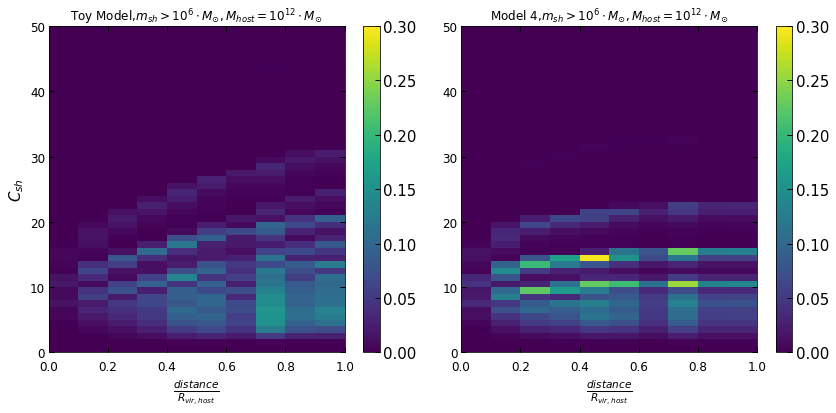

In [44]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))
bin_x = np.arange(0,1.1,0.1)
bin_y = np.arange(0,51,1)
m_min=6

w = (m0_new>10**m_min*Msolar)*(survive_new==1)
cb1=ax1.hist2d(r_new[w],ct0_new[w],
              weights=weight_new[w], density=True,bins=[bin_x, bin_y],vmin=0, vmax=0.3)

w = (m0_new2>10**m_min*Msolar)*(survive_new2==1)
cb2=ax2.hist2d(r_new2[w],ct0_new2[w],
              weights=weight_new2[w], density=True,bins=[bin_x, bin_y],vmin=0, vmax=0.3)

for ax in (ax1,ax2):
    ax.tick_params(labelsize=12)
    ax.set_xlabel(r'$\frac{distance}{R_{vir,host}}$')
ax1.set_ylabel(r'$C_{sh}$')
fig.colorbar(cb1[3],ax=ax1, orientation='vertical')
fig.colorbar(cb2[3],ax=ax2, orientation='vertical')
ax1.set_title('Toy Model,$m_{sh}>10^{6} \cdot M_{\odot},M_{host}=10^{12} \cdot M_{\odot}$',fontsize=12)
ax2.set_title('Model 4,$m_{sh}>10^{6} \cdot M_{\odot},M_{host}=10^{12} \cdot M_{\odot}$',fontsize=12)

plt.tight_layout()
#plt.savefig('subh_comp_2d_mass_6_distane_c_toy_4.png')
plt.show()

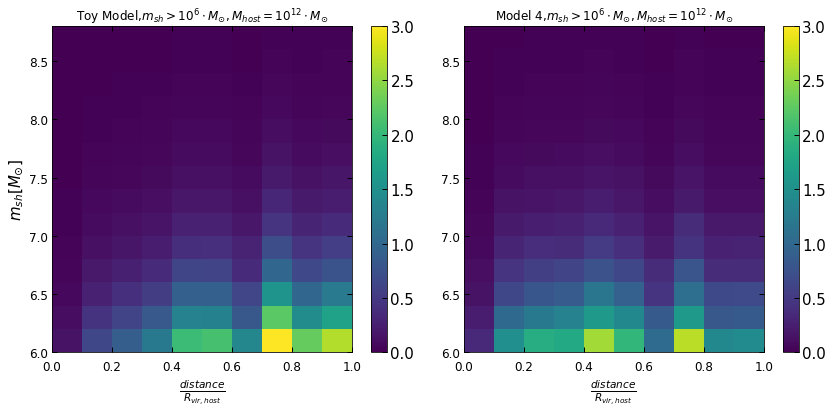

In [41]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))
bin_x = np.arange(0,1.1,0.1)
bin_y = np.arange(6,9,0.2)
m_min=6

w = (m0_new>10**m_min*Msolar)*(survive_new==1)
cb1=ax1.hist2d(r_new[w],np.log10(m0_new[w]/Msolar),
              weights=weight_new[w], density=True,bins=[bin_x, bin_y],vmin=0, vmax=3)

w = (m0_new2>10**m_min*Msolar)*(survive_new2==1)
cb2=ax2.hist2d(r_new2[w],np.log10(m0_new2[w]/Msolar),
              weights=weight_new2[w], density=True,bins=[bin_x, bin_y],vmin=0, vmax=3)

for ax in (ax1,ax2):
    ax.tick_params(labelsize=12)
    ax.set_xlabel(r'$\frac{distance}{R_{vir,host}}$')
ax1.set_ylabel(r'$m_{sh}[M_{\odot}]$')
fig.colorbar(cb1[3],ax=ax1, orientation='vertical')
fig.colorbar(cb2[3],ax=ax2, orientation='vertical')
ax1.set_title('Toy Model,$m_{sh}>10^{6} \cdot M_{\odot},M_{host}=10^{12} \cdot M_{\odot}$',fontsize=12)
ax2.set_title('Model 4,$m_{sh}>10^{6} \cdot M_{\odot},M_{host}=10^{12} \cdot M_{\odot}$',fontsize=12)

plt.tight_layout()
#plt.savefig('subh_comp_2d_distane_mass_6_toy_4.png')
plt.show()

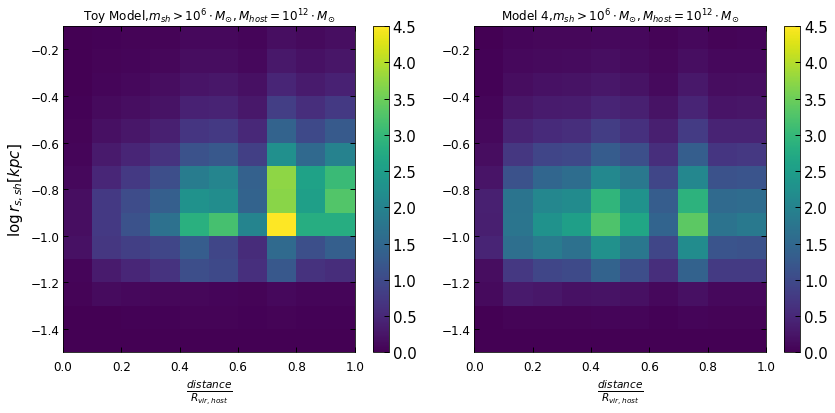

In [42]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))
bin_x = np.arange(0,1.1,0.1)
bin_y = np.arange(-1.5,0,0.1)
m_min=6

w = (m0_new>10**m_min*Msolar)*(survive_new==1)
cb1=ax1.hist2d(r_new[w],np.log10(rs0_new[w]/kpc),
              weights=weight_new[w], density=True,bins=[bin_x, bin_y],vmin=0, vmax=4.5)

w = (m0_new2>10**m_min*Msolar)*(survive_new2==1)
cb2=ax2.hist2d(r_new2[w],np.log10(rs0_new2[w]/kpc),
              weights=weight_new2[w], density=True,bins=[bin_x, bin_y],vmin=0, vmax=4.5)

for ax in (ax1,ax2):
    ax.tick_params(labelsize=12)
    ax.set_xlabel(r'$\frac{distance}{R_{vir,host}}$')
ax1.set_ylabel(r'$\logr_{s,sh}[kpc]$')
fig.colorbar(cb1[3],ax=ax1, orientation='vertical')
fig.colorbar(cb2[3],ax=ax2, orientation='vertical')
ax1.set_title('Toy Model,$m_{sh}>10^{6} \cdot M_{\odot},M_{host}=10^{12} \cdot M_{\odot}$',fontsize=12)
ax2.set_title('Model 4,$m_{sh}>10^{6} \cdot M_{\odot},M_{host}=10^{12} \cdot M_{\odot}$',fontsize=12)

plt.tight_layout()
#plt.savefig('subh_comp_2d_distane_rs_mass_6_toy_4.png')
plt.show()